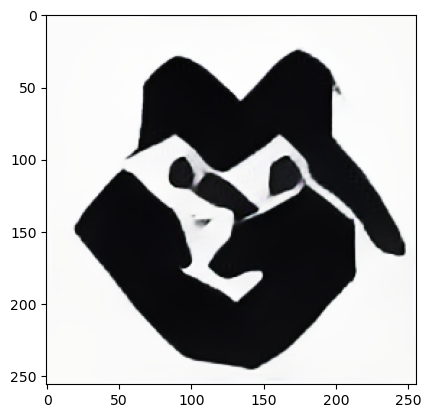

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
import matplotlib.pyplot as plt
import os

def get_image_paths():
    """get image paths inside of /examples"""
    image_names = os.listdir("examples")
    image_paths = [
        os.path.join("examples", image_name)
        for image_name in image_names
        if image_name.endswith(".png") or image_name.endswith(".jpg")
    ]
    return image_paths

def load_images(image_paths):
    """fetch image files and return as list"""
    return [Image.open(path) for path in image_paths]

def preprocess_images(images):
    """change the size of image and convert it into tensor"""
    images = [img.convert("RGB").resize((256, 256)) for img in images]  # RGBに変換
    return [
        tf.expand_dims(tf.convert_to_tensor(image, dtype=tf.float32) / 255.0, 0)
        for image in images
    ]

def style_transfer(content_image, style_image, model):
    """change style and return result"""
    stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]
    return stylized_image

def main():
    image_paths = get_image_paths()

    images = load_images(image_paths)

    images = preprocess_images(images)

    style_transfer_model = hub.load(
        "https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2"
    )

    content_image = images[0]
    style_image = images[1]
    stylized_image = style_transfer(content_image, style_image, style_transfer_model)

    plt.imshow(stylized_image.numpy().squeeze())
    plt.show()

    tf.keras.preprocessing.image.save_img("generated_icon.jpg", stylized_image[0])

if __name__ == "__main__":
    main()
